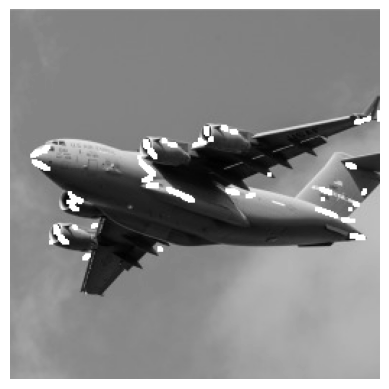

In [9]:
# Load libraries
import cv2
import numpy as np
from matplotlib import pyplot as plt
# Load image as grayscale
image_bgr = cv2.imread("../sim_data/images/plane_256x256.jpg")
image_gray = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2GRAY)
image_gray = np.float32(image_gray)
# Set corner detector parameters
block_size = 2
aperture = 29
free_parameter = 0.04
# Detect corners
detector_responses = cv2.cornerHarris(image_gray,
block_size,
aperture,
free_parameter)
# Large corner markers
detector_responses = cv2.dilate(detector_responses, None)
# Only keep detector responses greater than threshold, mark as white
threshold = 0.02
image_bgr[detector_responses >threshold *
detector_responses.max()] = [255,255,255]
# Convert to grayscale
image_gray = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2GRAY)
# Show image
plt.imshow(image_gray, cmap="gray"), plt.axis("off")
plt.show()


You want to detect the corners in an image. Use OpenCV’s implementation of the Harris corner detector, cornerHarris

The Harris corner detector is a commonly used method of detecting the
intersection of two edges. Our interest in detecting corners is motivated by the
same reason as for deleting edges: corners are points of high information. A
complete explanation of the Harris corner detector is available in the external
resources at the end of this recipe, but a simplified explanation is that it looks for
windows (also called neighborhoods or patches) where small movements of the
window (imagine shaking the window) creates big changes in the contents of the
pixels inside the window. cornerHarris contains three important parameters
that we can use to control the edges detected. First, block_size is the size of the
neighbor around each pixel used for corner detection. Second, aperture is the
size of the Sobel kernel used (don’t worry if you don’t know what that is), and
finally there is a free parameter where larger values correspond to identifying
softer corners

The output is a grayscale image depicting potential corners:

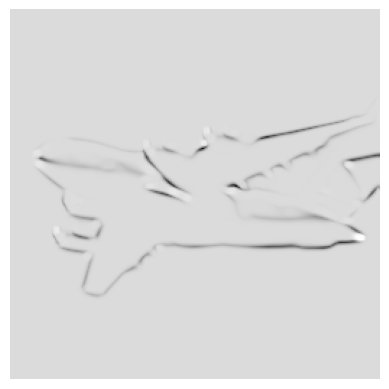

In [10]:
# Show potential corners
plt.imshow(detector_responses, cmap='gray'), plt.axis("off")
plt.show()